# Business Analysis

## Setup

#### Import Modules

In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

from src.metrics import *
from src.viz import *

apply_style()

#### Load Cleaned Data

In [2]:
df = pd.read_csv('../data/processed/cleaned_transactions.csv', parse_dates=['InvoiceDate'])

#### Notes

- All incomplete periods have been removed from analysis when appropriate.

## Business Questions

### Time

#### How has monthly revenue evolved over time? 

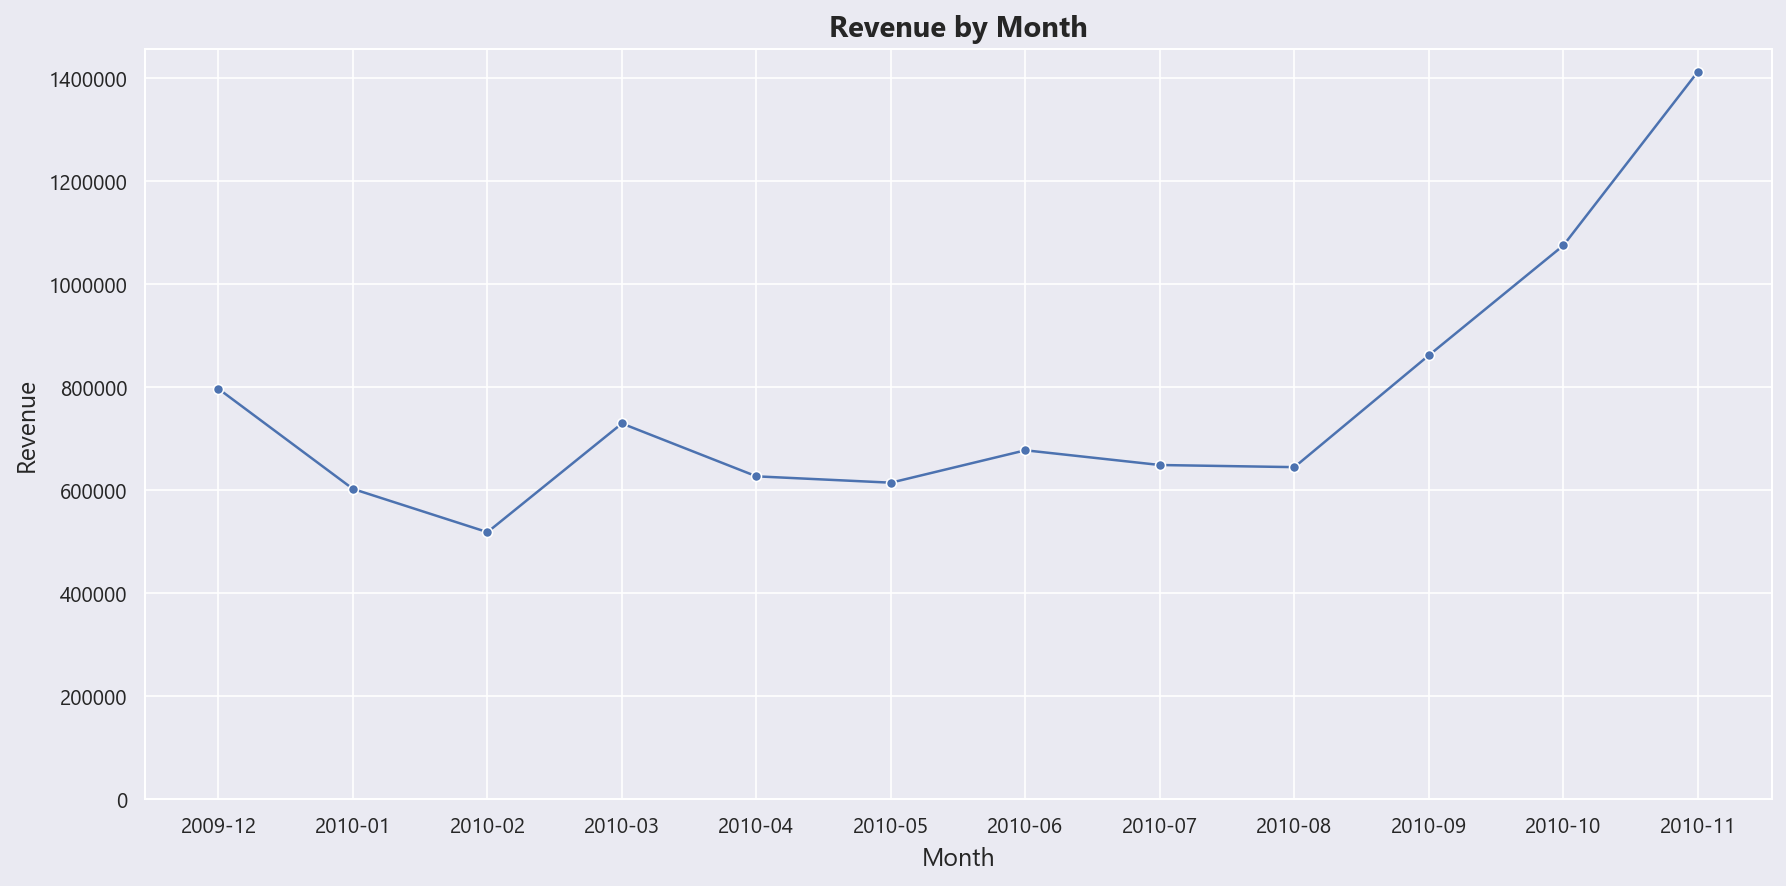

In [3]:
data = revenue_by_period(df, 'month')
line_chart(data,'YearMonth','Revenue','Month','Revenue','Revenue by Month')

- Revenue is stable throughout mid-2010, hovering around £650k for most of the year before rising sharply throughout Q4 where it eventually tops £1.4M in November.
- Q4 2010 promises to be much more successful than 2009, based on the limited data from each period.
- This figure suggests strong year-end seasonality. 

#### Is there evidence of seasonality in sales? 

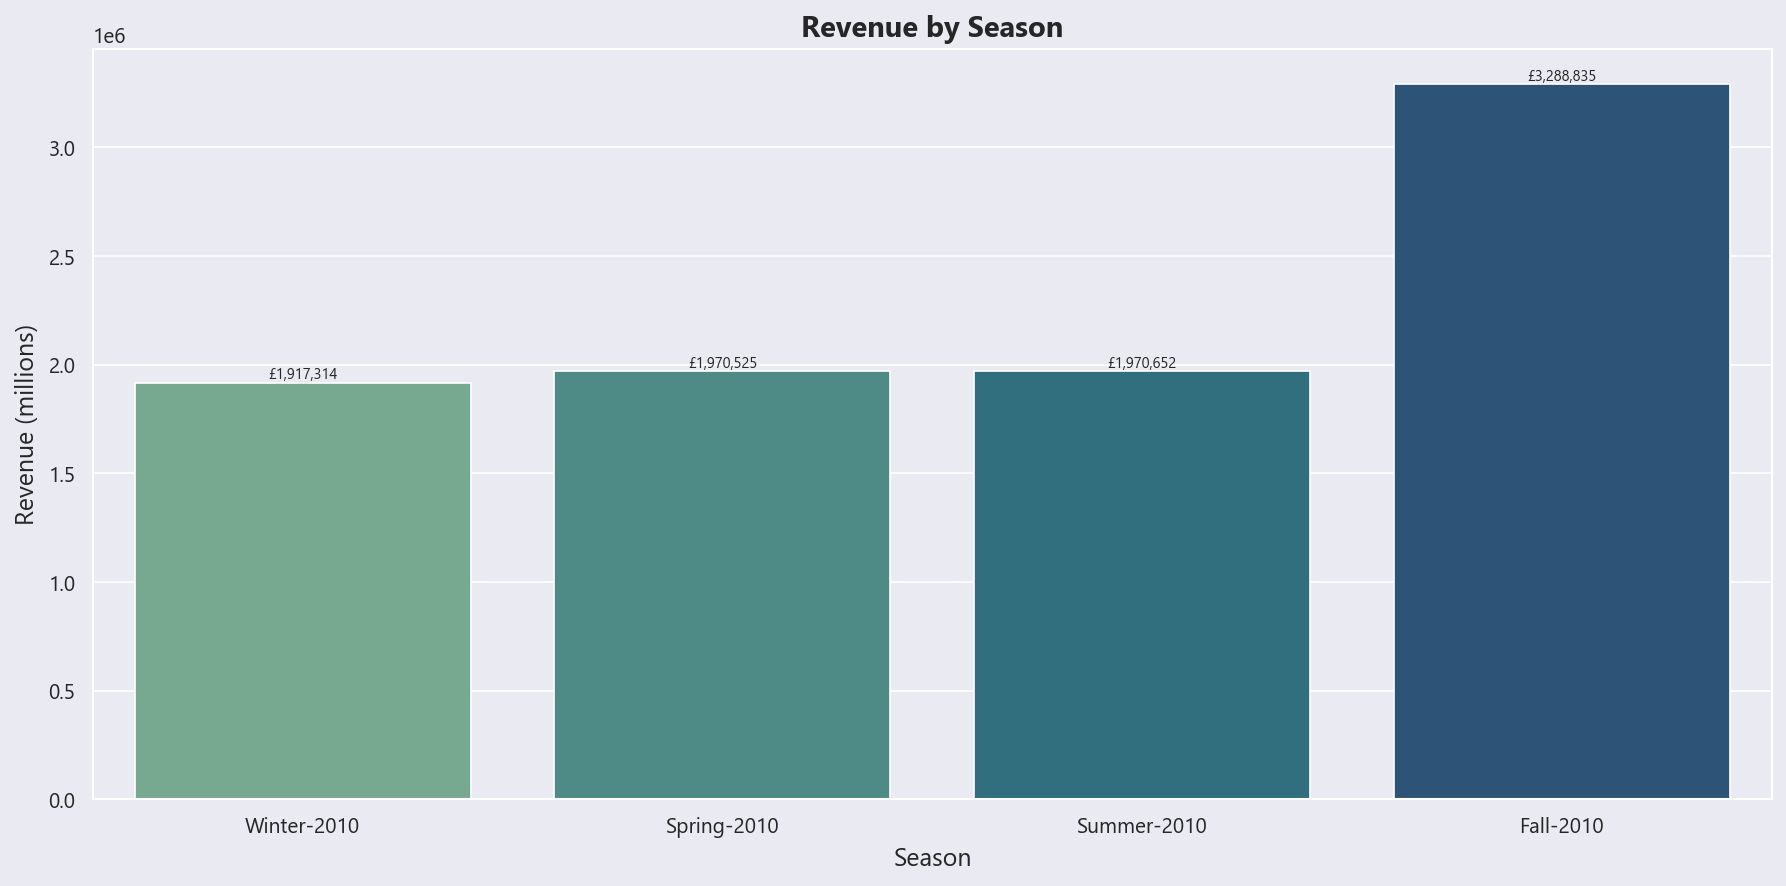

In [4]:
data = revenue_by_period(df, 'season')
plot_bar(data,'SeasonYear','Revenue','Revenue by Season','Season','Revenue (millions)', units='£')

- Total revenue remains stable throughout Winter, Spring and Summer 2010, with each season just below £2M.
- Fall gains £1.3M in average revenue compared to the other seasons in 2010, suggesting year-end seasonality. 

#### What is the average order value, and how has it changed?

In [5]:
aov(df)\
.style.format({'AOV': '£{:,.2f}'})

,AOV
0,£411.27


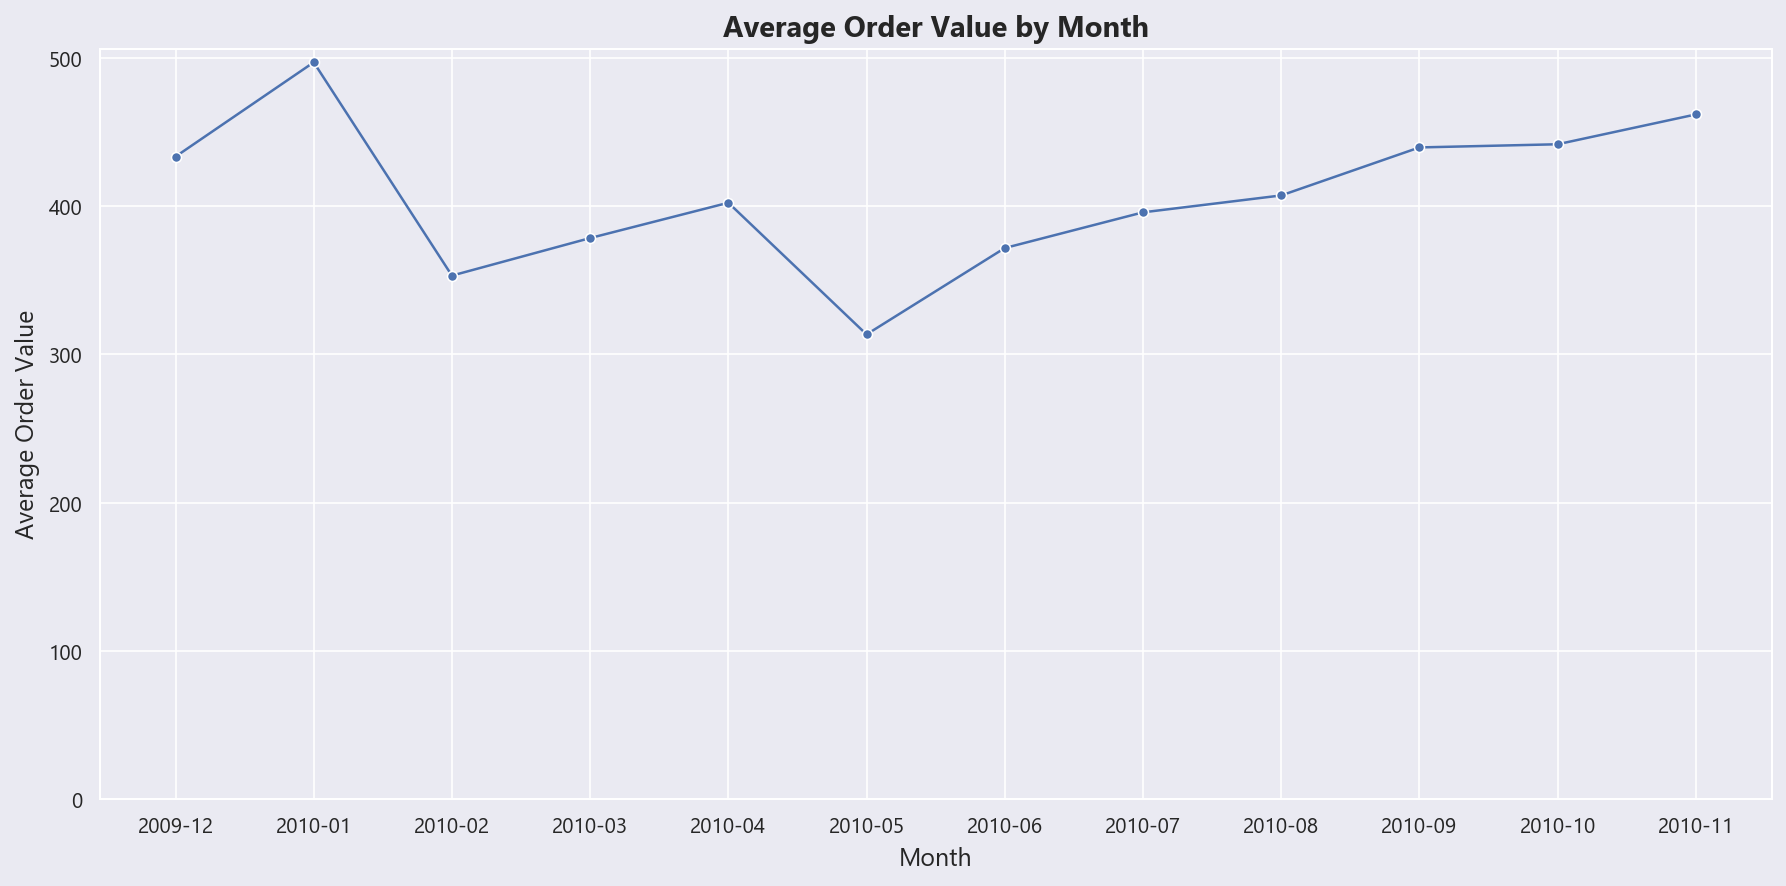

In [6]:
data = aov(df,'month')
line_chart(data,'YearMonth','AOV','Month','Average Order Value','Average Order Value by Month')

- The overall average order value is £411, and ranges from £313 to £496. Significant dip in revenue observed in May.
- Modest increases in AOV during Q4 suggests revenue growth during that period comes from more orders, not larger ones.

### Customers

#### What share of revenue comes from repeat customers?

In [7]:
repeat_customer_revenue(df)

Repeat customers spent £8,176,251 , which represents 94.25% of all sales.


- Nearly all revenue is attributed to customers who have ordered two or more times. 

#### How concentrated is revenue among customers? 

Note:  20.7% of transactions are excluded due to unknown customers.


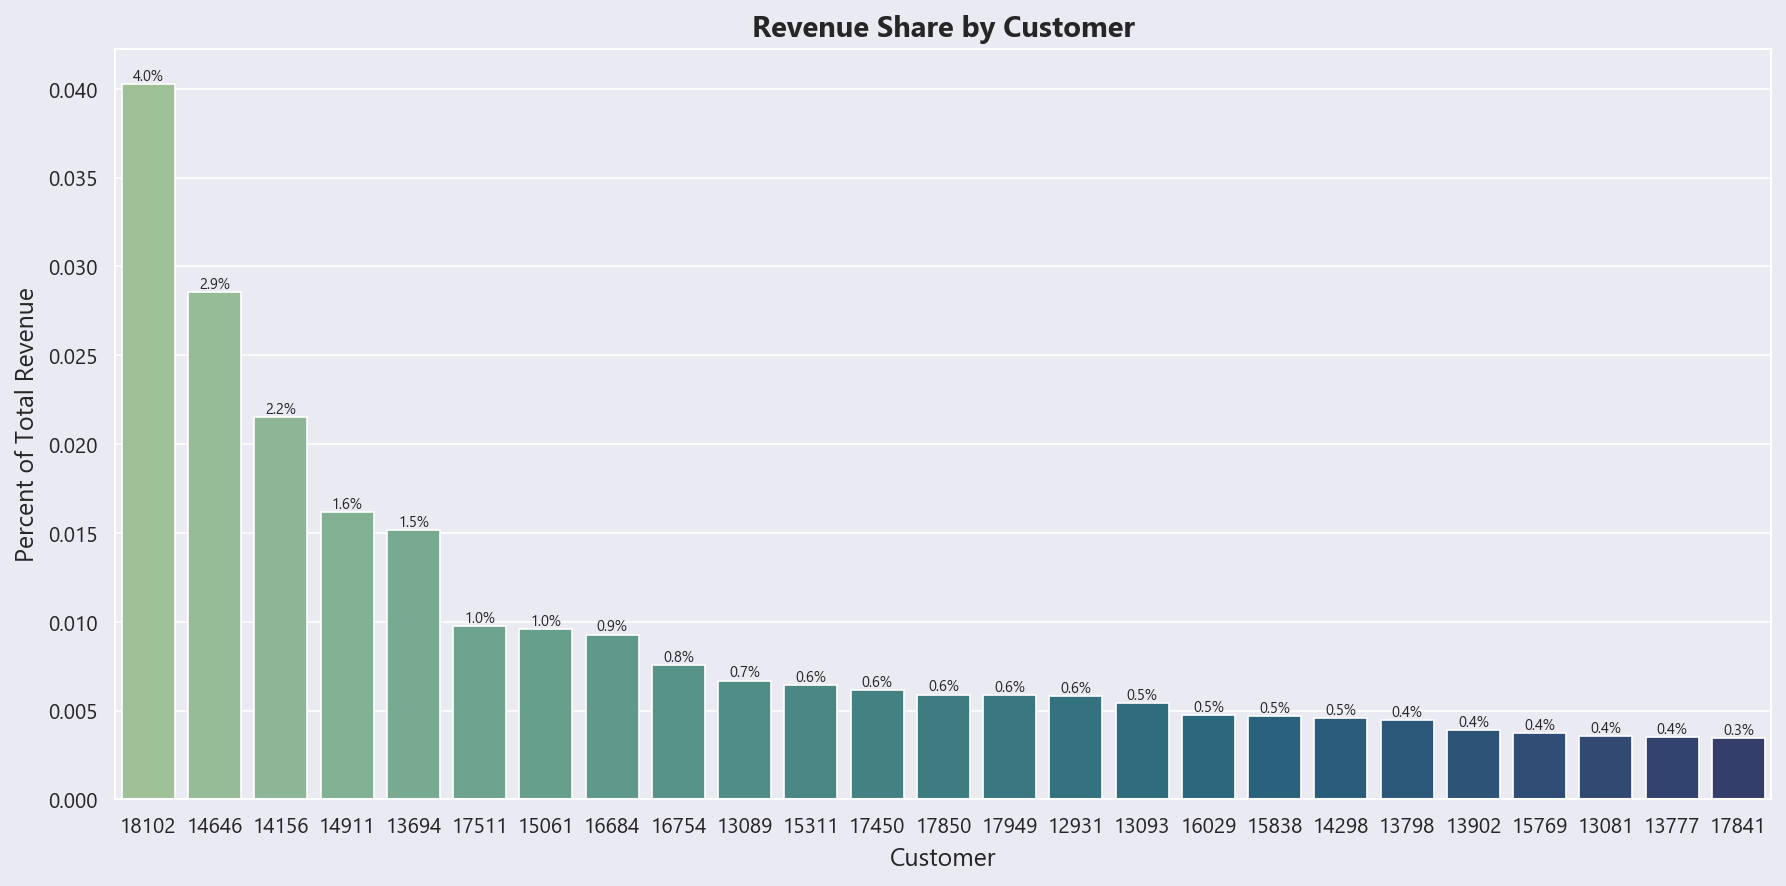

In [8]:
data = customer_concentration(df).head(25)
plot_bar(data,'CustomerID','Percentage','Revenue Share by Customer','Customer','Percent of Total Revenue')

- The largest customer is responsible for 4% of revenue.
- 15% of all revenue is generated by just 8 customers (≈0.2% of customers), suggesting moderate concentration.

### Products

#### Which products drive the majority of revenue? 

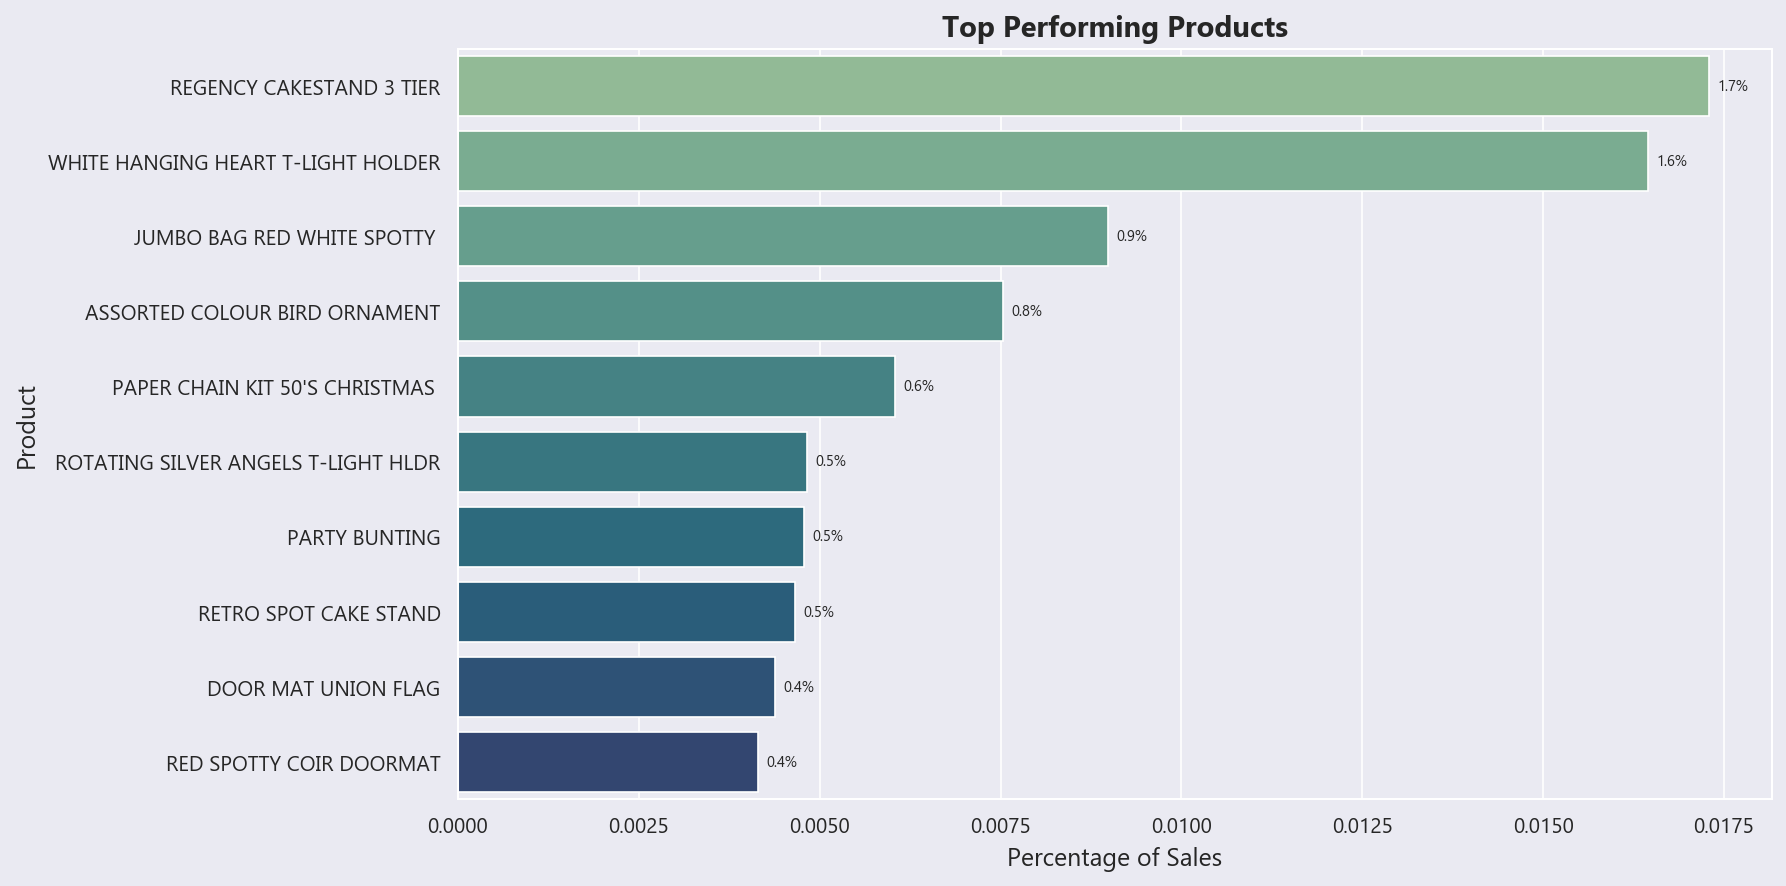

In [9]:
data = product_concentration(df).head(10)
plot_hbar(data,'Percentage','Description','Top Performing Products','Percentage of Sales','Product', units='%')

- The highest grossing product is responsible for 1.7% of all revenue.
- 7.9% of all revenue is generated by the top 10 customers (≈0.24% of clients), suggesting low concentration.

In [10]:
product_concentration(df)\
    .head(10).style.format({'Revenue': '£{:,.0f}','Percentage': '{:,.1%}'})

,StockCode,Description,Revenue,Percentage,Quantity
0,22423,REGENCY CAKESTAND 3 TIER,"£166,215",1.7%,13395
1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,"£158,027",1.6%,58296
2,85099B,JUMBO BAG RED WHITE SPOTTY,"£86,391",0.9%,48478
3,84879,ASSORTED COLOUR BIRD ORNAMENT,"£72,361",0.8%,44915
4,22086,PAPER CHAIN KIT 50'S CHRISTMAS,"£58,012",0.6%,17166
5,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,"£46,386",0.5%,22422
6,47566,PARTY BUNTING,"£45,935",0.5%,9277
7,21843,RETRO SPOT CAKE STAND,"£44,773",0.5%,4233
8,48138,DOOR MAT UNION FLAG,"£42,163",0.4%,6415
9,20685,RED SPOTTY COIR DOORMAT,"£39,822",0.4%,5888


#### What percentage of gross revenue is lost to returns?

In [11]:
f'{return_percentage(df):.2%}'

'5.75%'

- 5.75% of gross revenue is lost to returns, falling well within a healthy range. 

#### Which products have disproportionately high return rates?

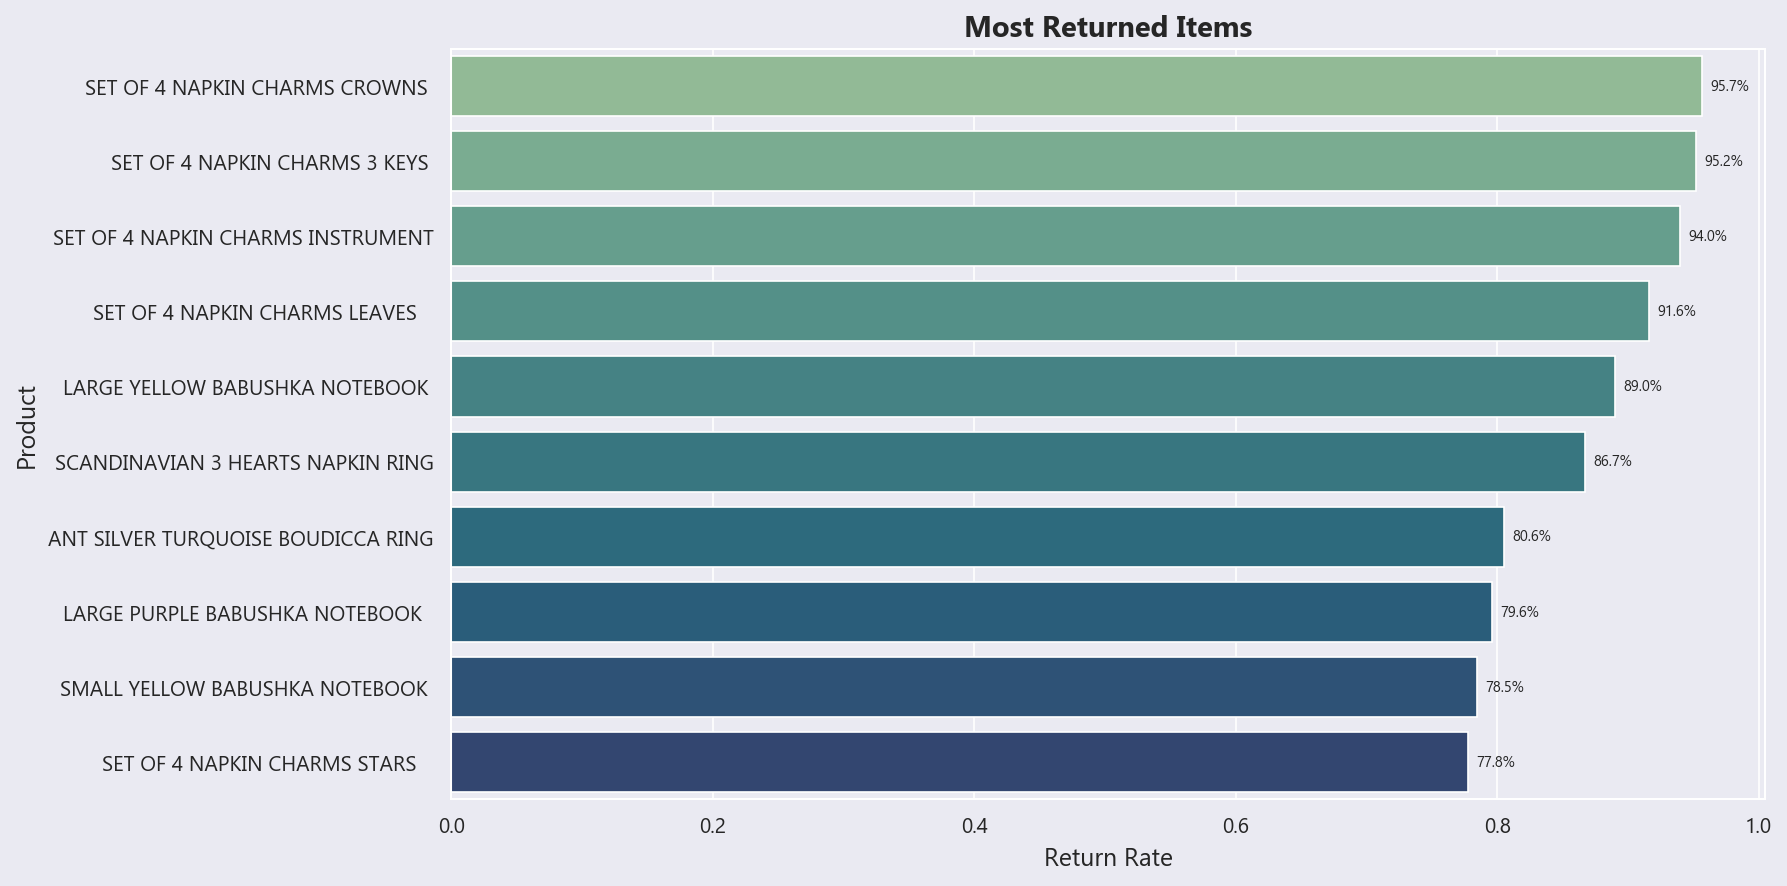

In [12]:
data = return_rates(df).head(10)
plot_hbar(data,'ReturnRate','Description','Most Returned Items','Return Rate','Product', units='%')

- Returns cannot be traced accurately back to their sales due to limited data window.
- 26 products have a return rate of over 50%, and 69 products have a return rate of over 25%.

In [13]:
return_rates(df)\
    .head(10).style.format({'Returns': '{:,.0f}','ReturnRate': '{:,.1%}'})

,StockCode,Returns,ItemsSold,ReturnRate,Description
0,22638,"2,560",2675,95.7%,SET OF 4 NAPKIN CHARMS CROWNS
1,22640,"2,560",2689,95.2%,SET OF 4 NAPKIN CHARMS 3 KEYS
2,22641,"2,560",2724,94.0%,SET OF 4 NAPKIN CHARMS INSTRUMENT
3,22643,"2,560",2794,91.6%,SET OF 4 NAPKIN CHARMS LEAVES
4,22756,"5,000",5618,89.0%,LARGE YELLOW BABUSHKA NOTEBOOK
5,85078,"2,300",2652,86.7%,SCANDINAVIAN 3 HEARTS NAPKIN RING
6,90162A,145,180,80.6%,ANT SILVER TURQUOISE BOUDICCA RING
7,22758,"5,000",6279,79.6%,LARGE PURPLE BABUSHKA NOTEBOOK
8,22753,"5,000",6371,78.5%,SMALL YELLOW BABUSHKA NOTEBOOK
9,22642,"2,560",3291,77.8%,SET OF 4 NAPKIN CHARMS STARS


### Geography

#### How is revenue distributed geographically? 

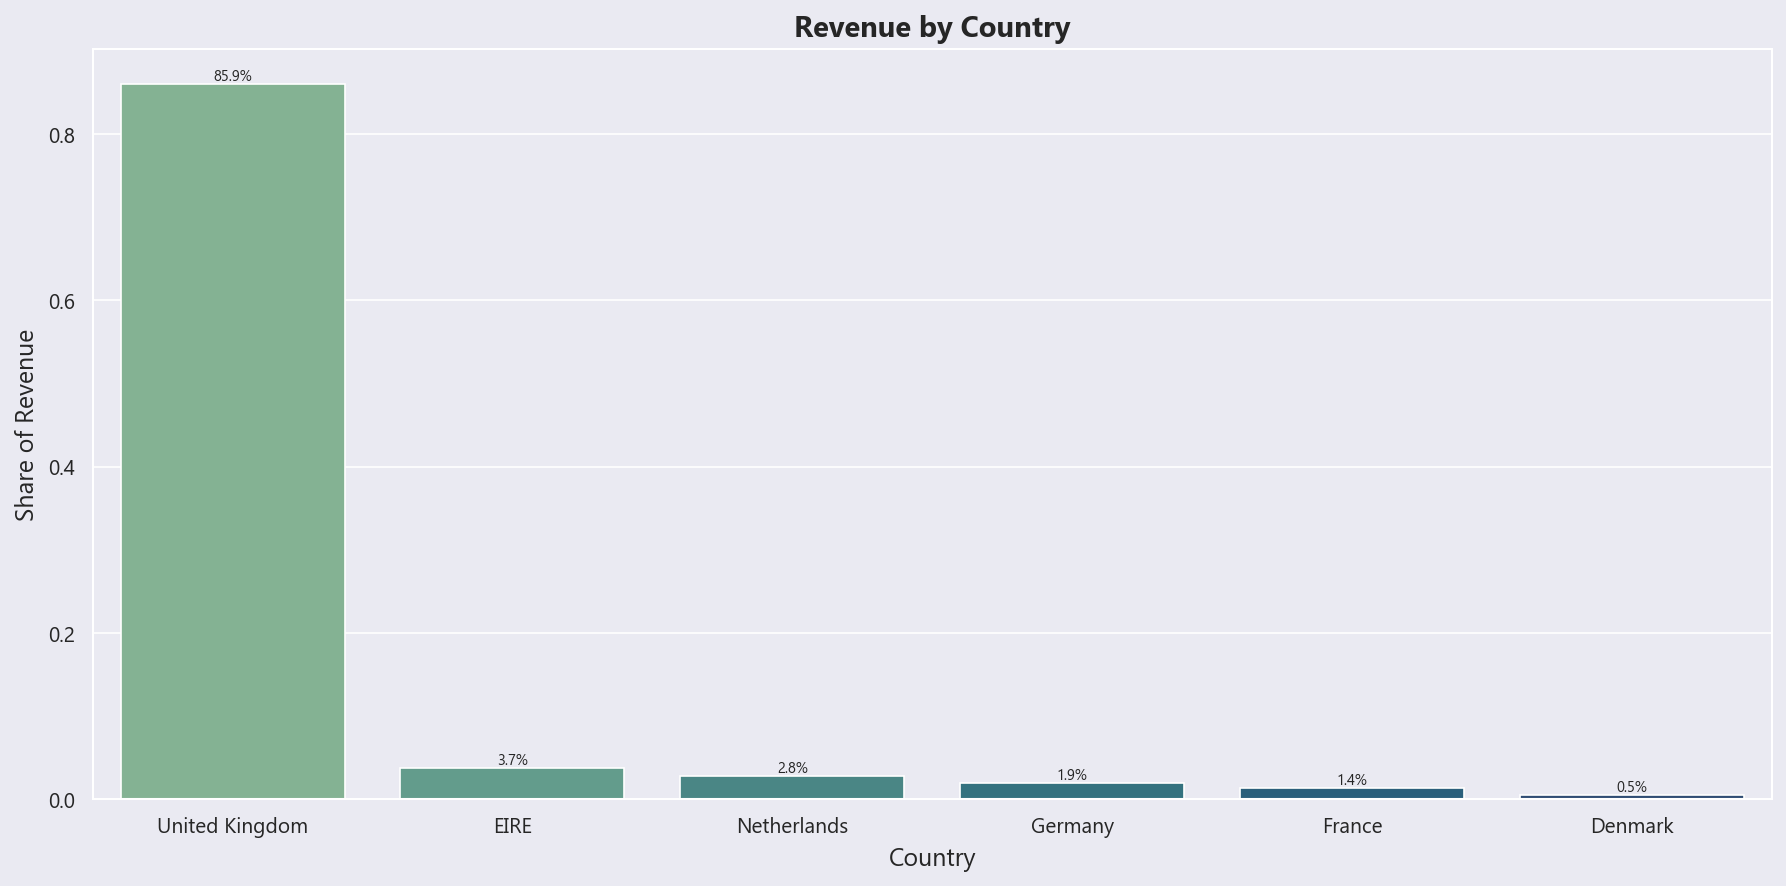

In [14]:
data = revenue_by_country(df).head(6).reset_index()
plot_bar(data,'Country','Percentage','Revenue by Country','Country','Share of Revenue')

- 86% of all revenue is generated in the U.K.
- 95% of revenue is generated in Europe.

In [15]:
revenue_by_country(df).reset_index()\
    .head(10).style.format({'Revenue': '£{:,.0f}','Percentage': '{:,.1%}'})

,Country,Revenue,Percentage
0,United Kingdom,"£8,256,734",85.9%
1,EIRE,"£357,769",3.7%
2,Netherlands,"£266,188",2.8%
3,Germany,"£183,370",1.9%
4,France,"£132,366",1.4%
5,Denmark,"£50,349",0.5%
6,Sweden,"£49,514",0.5%
7,Spain,"£42,888",0.4%
8,Switzerland,"£41,182",0.4%
9,Australia,"£30,313",0.3%


#### Are certain markets growing faster than others? 

Note: 32 (20%) countries are excluded due to insufficient revenue.


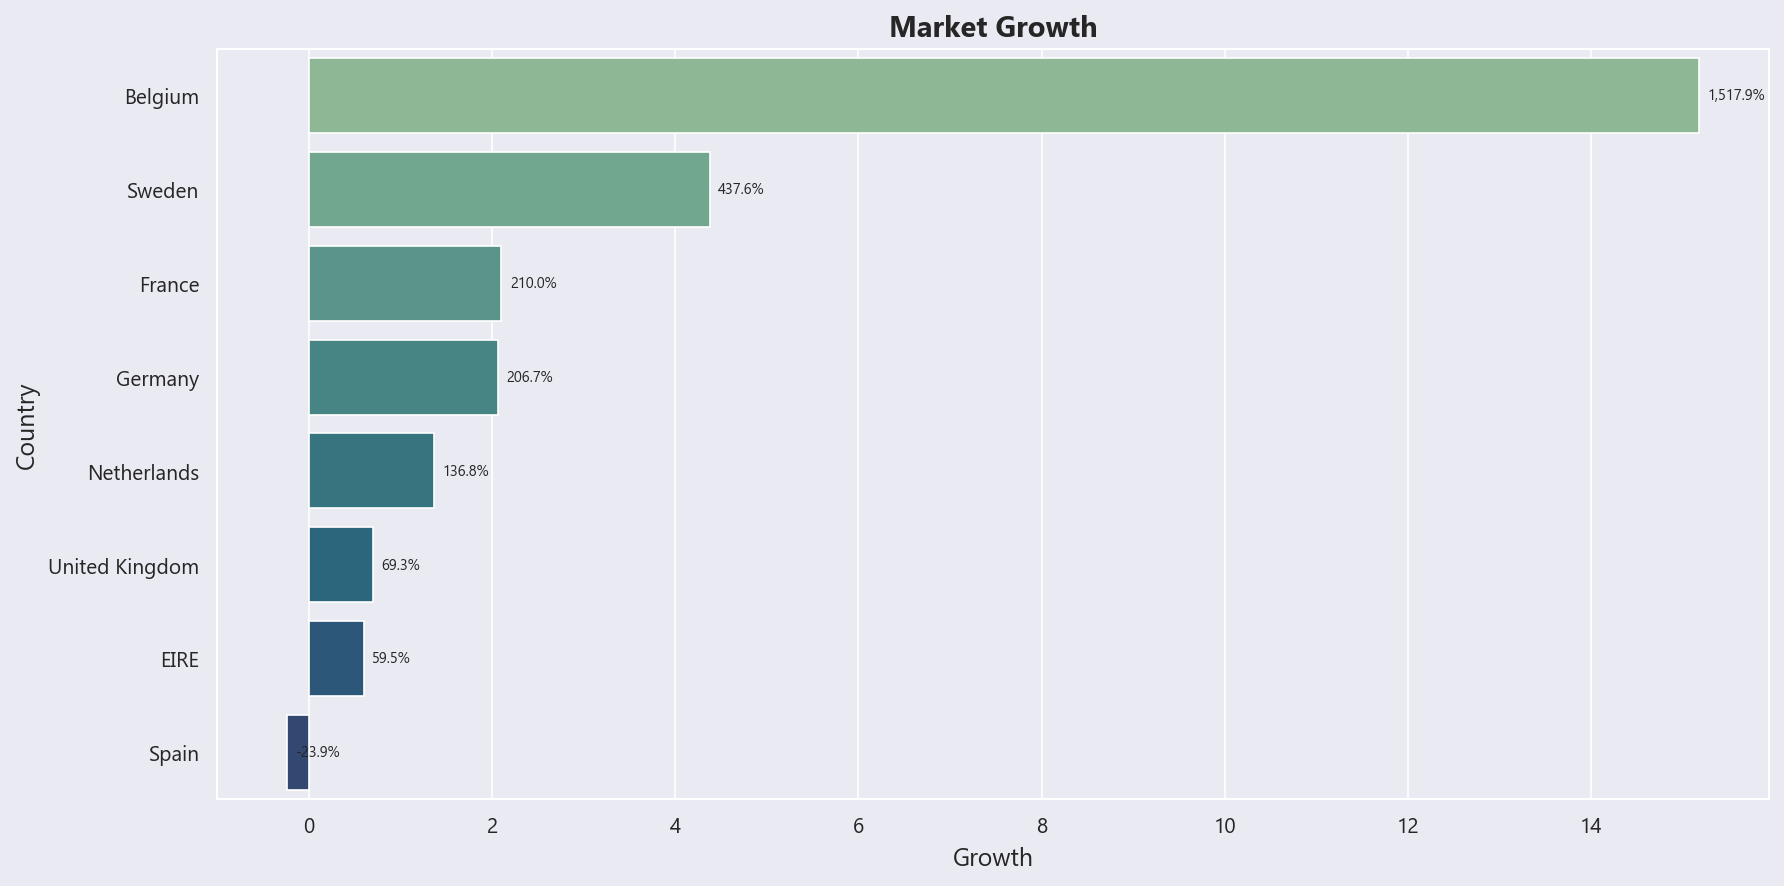

In [16]:
data = market_growth(df).reset_index()
plot_hbar(data,'Total_Growth','Country','Market Growth','Growth','Country', units='%')

- Though markets like Belgium and Sweden show the highest relative growth, their overall market share remains marginal.
- U.K. growth represents the most significant real increase in revenue by far.
- France, Germany show 200%+ growth over this period 
- Netherlands and EIRE show steady growth during this period as well.

In [17]:
market_growth(df)\
    .style.format({'first_revenue': '£{:,.0f}', 'last_revenue': '£{:,.0f}', 'Total_Growth':'{:,.1%}'})

Note: 32 (20%) countries are excluded due to insufficient revenue.


,first_revenue,last_revenue,Total_Growth
Country,,,
Belgium,£288,"£4,653","1,517.9%"
Sweden,£285,"£1,534",437.6%
France,"£5,874","£18,211",210.0%
Germany,"£9,035","£27,709",206.7%
Netherlands,"£15,046","£35,630",136.8%
United Kingdom,"£725,232","£1,227,781",69.3%
EIRE,"£18,946","£30,221",59.5%
Spain,"£7,754","£5,902",-23.9%


# Recommendations

- Organize around seasonality. Order volume increases significantly in advance of Q4, and resources should be allocated accordingly. 
- Protect high-value customers. Due to significant customer concentration, care must be taken to maintain good relationships with key clients. 
- Review high-return products. Consider discontinuing SKUs with over 25% return rate, as they account for just 1.6% of all products.
- Focus on emerging markets. Though the majority of revenue is generated in the U.K., nearby markets such as France and Germany show promise.